# <font color='#eb3483'> SVM Exercises </font>

It's time for you to build your own SVM! We're going to use the same dataset as our decision tree exercises, and see if we can do better using SVMs instead of decision trees.

We'll start by loading in the wine data set from sklearn and get it ready for machine learning with scikit-learn (i.e. break into X, Y).

In [1]:
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

In [2]:
wine = datasets.load_wine()
wine.keys()

X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
Y = pd.Series(wine['target'])

### <font color='#eb3483'> Exercise 1 </font>

Build a SVM for the wine data, and get a cross-validated score of it's accuracy (note ROC_AUC won't work for this problem as a metric because we're trying to predict multiple classes). Hint use the `cross_val_score` function from sklearn.model_selection 

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm =  SVC()
cross_val_score(svm, X, Y, scoring="accuracy", 
                cv=3).mean()

0.657532956685499

### <font color='#eb3483'> Exercise 2 </font>

Let's dig a little deeper into your classifier. Fit an SVM on the full dataset and graph the decision boundary `mlxtend` (we've imported the right function for you below - how can you check what you'll need to fit in?). For plotting use the two most important features you found in your decision tree exercise (if you didn't get to it, use the last two features proline and the od ratio). 

In [4]:
svm.fit(X, Y)
svm.n_support_

array([18, 48, 48], dtype=int32)

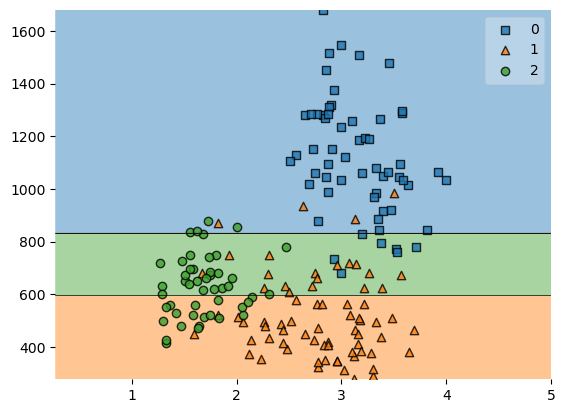

In [5]:
from mlxtend.plotting import plot_decision_regions
X_subset = X[['od280/od315_of_diluted_wines','proline']]
svm.fit(X_subset, Y)
plot_decision_regions(X_subset.to_numpy(), Y.to_numpy(), clf=svm);

### <font color='#eb3483'> Exercise 3 </font>

Try different kernels for this data - which is the best (try `linear`, `poly` and `RBF`)? Repeat the plot from exercise two with your best kernel.

In [6]:
results = []
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm =  SVC(kernel = kernel)
    results.append(cross_val_score(svm, X, Y, scoring="accuracy", 
                cv=3).mean())
print("Best Kernel: ", kernels[np.argmax(results)])

Best Kernel:  linear


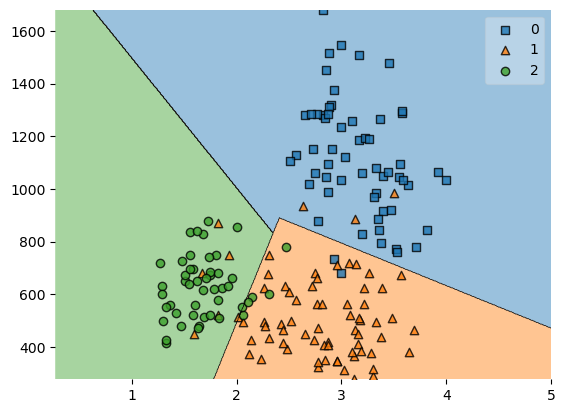

In [7]:

from mlxtend.plotting import plot_decision_regions
X_subset = X[['od280/od315_of_diluted_wines','proline']]
svm =  SVC(kernel = 'linear')
svm.fit(X_subset, Y)
plot_decision_regions(X_subset.to_numpy(), Y.to_numpy(), clf=svm);